## Лабораторная работа № 4

### Задание № 3

In [223]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [224]:
# Чтение таблицы x - f(x) из файла

xArr = np.zeros((20), dtype = float)
yArr = np.zeros((20), dtype = float)

openFile = np.loadtxt("data.csv")
for i in range(10):
    xArr[2 * i] = openFile[i + 220][0]
    yArr[2 * i] = openFile[i + 220][1]

In [225]:
# Поиск базисных полиномов многочлена Лагранжа

def l(xk):
    global xArr
    x = sp.symbols('x')
    p = 1
    for i in range(10):
        if xArr[2 * i] != xk:
            p *= (x - xArr[2 * i]) / (xk - xArr[2 * i])
    return p

In [226]:
# Построение интерполяционного многочлена Лагранжа

Lagrange = 0
for i in range(10):
    Lagrange += yArr[2 * i] * l(xArr[2 * i])

In [227]:
# Добавление в таблицу новых узлов со значениями

for i in range(10):
    xArr[2 * i + 1] = xArr[2 * i] + 0.05
    yArr[2 * i + 1] = Lagrange.subs(x, xArr[2 * i + 1])

In [228]:
print (xArr)
print (yArr)

[ 23.    23.05  23.1   23.15  23.2   23.25  23.3   23.35  23.4   23.45  23.5   23.55  23.6   23.65  23.7   23.75  23.8   23.85  23.9   23.95]
[-0.00046   0.156228  0.309544  0.455705  0.591083  0.712301  0.816324  0.900533  0.962789  1.001489  1.015605  1.004713  0.969005  0.909287  0.826959  0.723983  0.602835  0.466448  0.318152  0.161614]


In [230]:
# Экстраполяция

# 5 узлов от начала

ex_xArr0 = np.zeros((5), dtype = float)
ex_yArr0 = np.zeros((5), dtype = float)

# 5 узлов от конца

ex_xArr1 = np.zeros((5), dtype = float)
ex_yArr1 = np.zeros((5), dtype = float)

for i in range(5):
    ex_xArr0[-1 - i] = 23. - 0.1 * (i + 1)
    ex_yArr0[-1 - i] = Lagrange.subs(x, ex_xArr0[-1 - i])
    
    ex_xArr1[i] = 23.9 + 0.1 * (i + 1)
    ex_yArr1[i] = Lagrange.subs(x, ex_xArr1[i])

# Полная новая таблица значений

new_xArr = np.zeros((30), dtype = float)
new_yArr = np.zeros((30), dtype = float)

for i in range(30):
    if i < 5:
        new_xArr[i] = ex_xArr0[i]
        new_yArr[i] = ex_yArr0[i]
    elif 5 <= i < 25:
        new_xArr[i] = xArr[i - 5]
        new_yArr[i] = yArr[i - 5]
    elif i >= 25:
        new_xArr[i] = ex_xArr1[i - 25]
        new_yArr[i] = ex_yArr1[i - 25]

print (new_xArr)
print (new_yArr)

[ 22.5   22.6   22.7   22.8   22.9   23.    23.05  23.1   23.15  23.2   23.25  23.3   23.35  23.4   23.45  23.5   23.55  23.6   23.65  23.7   23.75  23.8   23.85  23.9   23.95  24.    24.1   24.2
  24.3   24.4 ]
[-1.11973  -0.982992 -0.813283 -0.586752 -0.308739 -0.00046   0.156228  0.309544  0.455705  0.591083  0.712301  0.816324  0.900533  0.962789  1.001489  1.015605  1.004713  0.969005  0.909287  0.826959
  0.723983  0.602835  0.466448  0.318152  0.161614  0.00079  -0.316534 -0.59613  -0.791419 -0.83625 ]


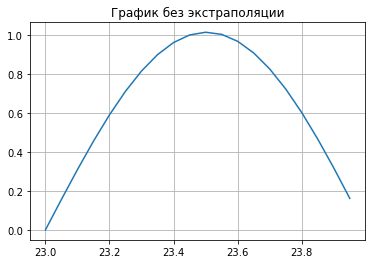

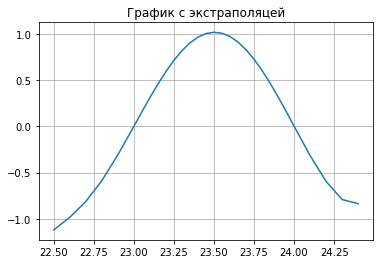

In [249]:
# Построение графика

# График без экстраполяции

fig0 = plt.figure()
plt.title('График без экстраполяции')
axes0 = fig0.add_subplot(111)
axes0.grid()
axes0.plot(xArr, yArr)

# График с экстраполяцией

fig1 = plt.figure()
plt.title('График c экстраполяцей')
axes1 = fig1.add_subplot(111)
axes1.grid()
axes1.plot(new_xArr, new_yArr)

plt.show()